In [1]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [151]:
genes=['gene'+str(i) for i in range(1,11)]
wt=['wt'+str(i) for i in range(1,6)]
ko=['ko'+str(i) for i in range(1,6)]
mo=['mo'+str(i) for i in range(1,6)]
data=pd.DataFrame(columns=[*wt,*ko,*mo],index=genes)

In [152]:
for gene in data.index:
    data.loc[gene,'wt1':'wt5']=np.random.poisson(lam=rd.randrange(10,1000),size=5)
    data.loc[gene,'ko1':'ko5']=np.random.poisson(lam=rd.randrange(10,1000),size=5)
    data.loc[gene,'mo1':'mo5']=np.random.poisson(lam=rd.randrange(10,1000),size=5)

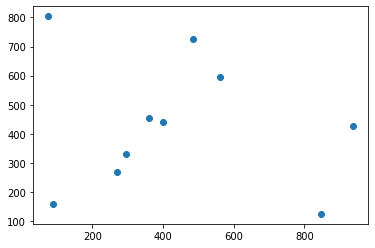

In [153]:
data.T
t=data.T
t
plt.scatter(data.wt1,data.ko4)

In [154]:
t

,gene1,gene2,gene3,gene4,gene5,gene6,gene7,gene8,gene9,gene10
wt1,561,75,486,360,88,937,399,848,296,269
wt2,512,84,490,317,65,887,397,858,316,256
wt3,528,70,458,324,75,919,353,812,314,284
wt4,548,90,454,379,69,849,370,864,299,304
wt5,577,73,465,322,73,895,376,772,335,275
ko1,640,775,720,456,193,431,458,141,327,270
ko2,635,735,700,443,131,448,471,130,330,251
ko3,645,776,747,471,142,444,410,123,352,294
ko4,597,804,726,456,159,427,441,125,330,268
ko5,595,726,784,424,165,462,456,132,328,246


In [155]:
scaled_data=preprocessing.scale(data.T)
pca=PCA()
pca.fit(scaled_data)
pca_data=pca.transform(scaled_data)

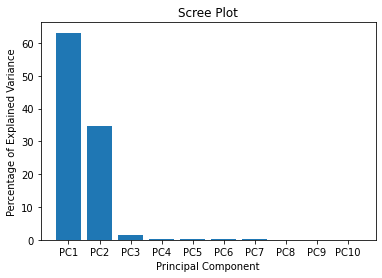

In [156]:
per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['PC'+ str(x) for x in range(1,len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [157]:
pca_df=pd.DataFrame(pca_data,index=[*wt,*ko,*mo],columns=labels)
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
wt1,-1.653983,2.151297,0.272269,0.295820,0.235330,-0.139323,-0.100619,0.025261,-0.027285,-0.008303
wt2,-1.597486,2.490118,-0.486485,0.176357,-0.157388,-0.003182,0.142203,0.016720,-0.006868,-0.037153
wt3,-1.901037,2.474287,-0.118320,-0.193463,-0.163097,0.042216,-0.130231,0.011619,-0.019586,0.011202
wt4,-1.821649,1.884579,0.881561,-0.093227,-0.062128,-0.015197,0.119395,0.025749,0.014967,0.052206
wt5,-1.966368,2.298909,-0.326149,-0.161320,0.162358,0.112105,-0.016923,-0.081617,0.043179,-0.021807
ko1,-1.688773,-2.364480,0.068626,-0.101183,0.128609,-0.109972,0.044096,-0.014028,-0.026818,-0.012607
ko2,-1.621199,-2.154504,-0.259507,0.151151,0.181326,0.156335,0.060852,-0.020897,-0.052388,0.034809
ko3,-2.167806,-2.479282,0.490539,-0.171905,-0.029412,0.008134,-0.050580,-0.029612,0.039820,-0.022913
ko4,-1.694275,-2.393923,0.033313,-0.000397,-0.189600,0.000796,-0.012155,0.013920,-0.078606,-0.031643
ko5,-1.612361,-1.960802,-0.607413,0.147193,-0.105311,-0.062607,-0.043922,0.053684,0.112755,0.036890


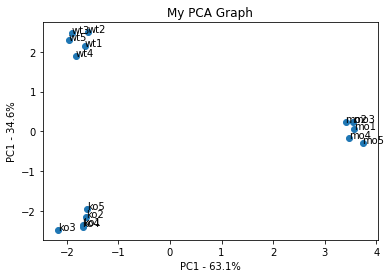

In [166]:
plt.scatter(pca_df.PC1,pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC1 - {0}%'.format(per_var[1]))
for sample in pca_df.index:
   plt.annotate(sample,(pca_df.PC1.loc[sample],pca_df.PC2.loc[sample]))

In [167]:
loading_scores=pd.Series(pca.components_[0],index=genes)
sorted_loading_scores=loading_scores.abs().sort_values(ascending=False)
top_10_genes=sorted_loading_scores[0:10].index.values
print(loading_scores[top_10_genes])

gene9    -0.396609
gene5     0.392074
gene7     0.390654
gene10   -0.387099
gene1    -0.385610
gene3    -0.368510
gene6    -0.220682
gene2    -0.191798
gene4     0.124381
gene8     0.032720
dtype: float64


In [165]:
t

,gene1,gene2,gene3,gene4,gene5,gene6,gene7,gene8,gene9,gene10
wt1,561,75,486,360,88,937,399,848,296,269
wt2,512,84,490,317,65,887,397,858,316,256
wt3,528,70,458,324,75,919,353,812,314,284
wt4,548,90,454,379,69,849,370,864,299,304
wt5,577,73,465,322,73,895,376,772,335,275
ko1,640,775,720,456,193,431,458,141,327,270
ko2,635,735,700,443,131,448,471,130,330,251
ko3,645,776,747,471,142,444,410,123,352,294
ko4,597,804,726,456,159,427,441,125,330,268
ko5,595,726,784,424,165,462,456,132,328,246


In [163]:
print(loading_scores[top_10_genes])

gene9    -0.396609
gene5     0.392074
gene7     0.390654
gene10   -0.387099
gene1    -0.385610
gene3    -0.368510
gene6    -0.220682
gene2    -0.191798
gene4     0.124381
gene8     0.032720
dtype: float64


In [169]:
from sklearn import preprocessing

x = data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.var()

0     0.111368
1     0.116924
2     0.107957
3     0.116562
4     0.107985
5     0.117026
6     0.130986
7     0.122313
8     0.110568
9     0.116351
10    0.131766
11    0.120931
12    0.124797
13    0.114783
14    0.121237
dtype: float64